ML ASSIGNMENT 7 - logistic regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/Users/navi/Downloads/Social_Network_Ads (1).csv", engine='python', encoding='utf-8')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.nunique()

User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

In [6]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [7]:
df.shape

(400, 5)

## EDA 

#### Univariate Analysis

In [8]:
# checking for null values
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
# checking for duplicate values
df.duplicated().sum()

0

In [10]:
# dropping user id
df.drop(columns=['User ID'],inplace=True)


In [11]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [12]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

<AxesSubplot:>

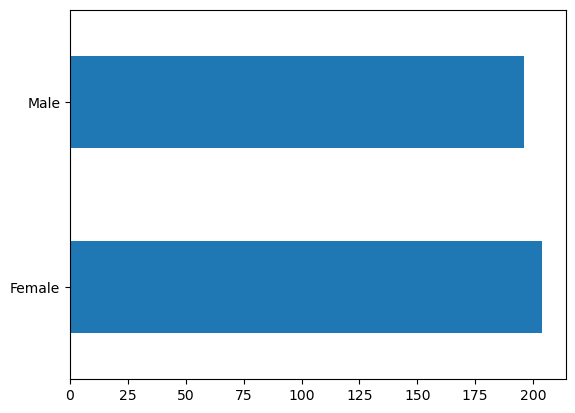

In [13]:
df['Gender'].value_counts().plot(kind='barh')

In [14]:
df['Age'].value_counts()

35    32
37    20
26    16
41    16
42    16
39    15
40    15
48    14
47    14
27    13
38    13
28    12
36    12
46    12
31    11
30    11
49    10
29    10
33     9
32     9
24     9
59     7
19     7
45     7
20     7
60     7
34     6
23     6
52     6
25     6
58     6
53     5
57     5
22     5
18     5
21     4
50     4
54     4
55     3
56     3
51     3
43     3
44     2
Name: Age, dtype: int64

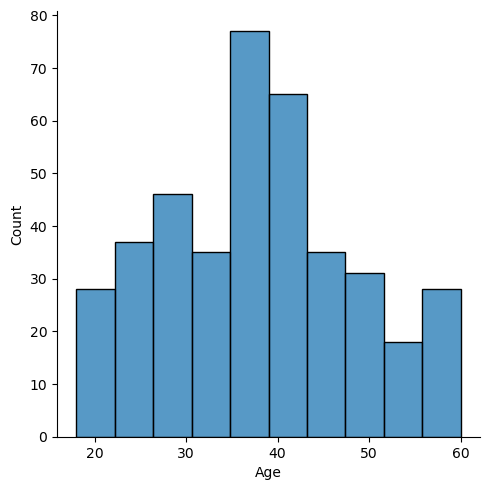

In [15]:
sns.displot(df['Age'])

In [16]:
df['Age'].describe()

count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64

We can observe that the age is normally distributed around 37 years old.

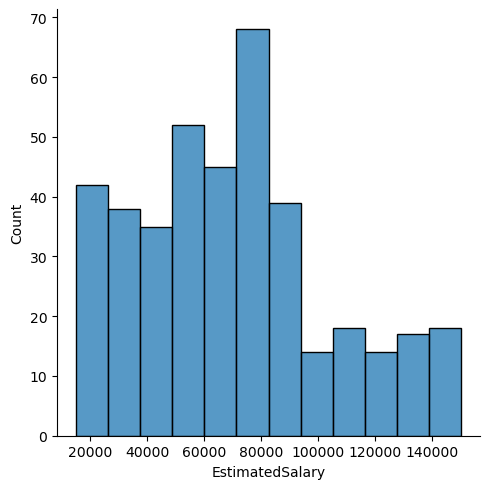

In [17]:
sns.displot(df['EstimatedSalary'])

In [18]:
df["EstimatedSalary"].describe()

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64

We can observe that the estimated salary is normally distributed around $70000

#### Bivariate Analysis

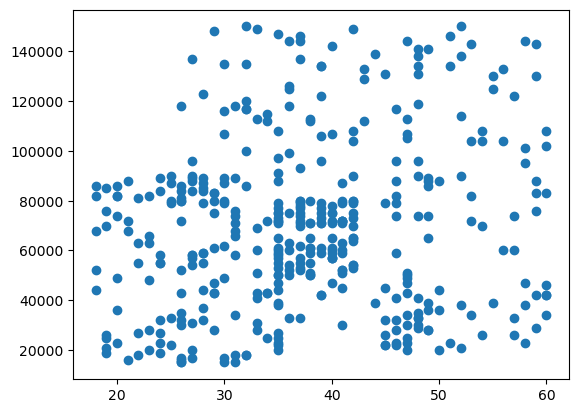

In [19]:
# relation between age and EstimatedSalary
plt.scatter(x='Age',y='EstimatedSalary',data=df)

We can observe that there is no apparent relation between age and estimated salary

<AxesSubplot:xlabel='Age', ylabel='Gender'>

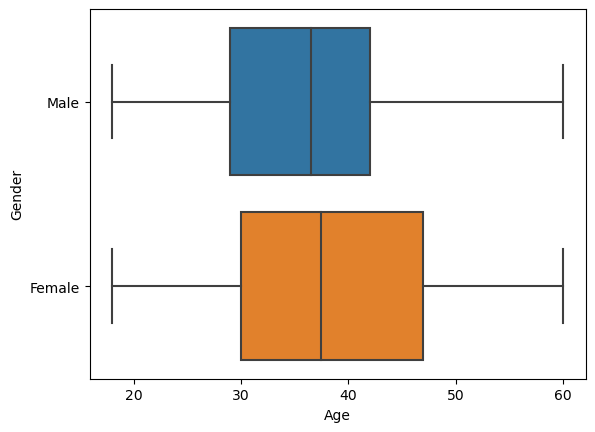

In [20]:
sns.boxplot(x='Age',y='Gender',data=df)

We can observe that the female demography contains more older individuals than the male demography.

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Gender'>

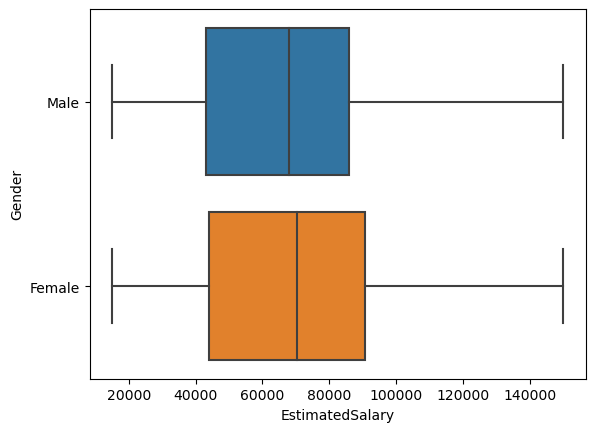

In [21]:
sns.boxplot(x='EstimatedSalary',y='Gender',data=df)

We can observe that the estimated salary of males and females is approximately the same.

<AxesSubplot:xlabel='Age', ylabel='Gender'>

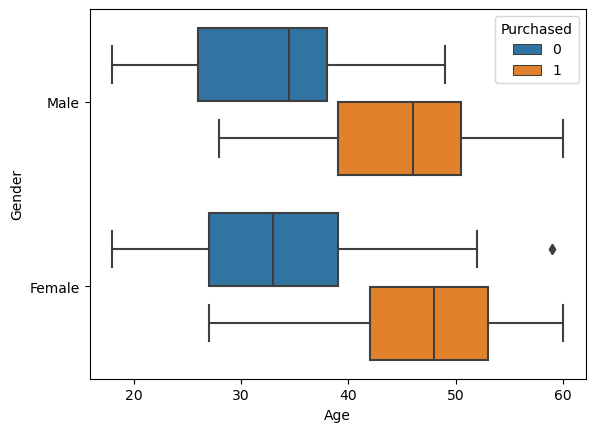

In [22]:
sns.boxplot(x='Age',y='Gender',data=df, hue='Purchased')

It can be seen that older age members of male and female demography are more probable to purchase than younger ones

<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

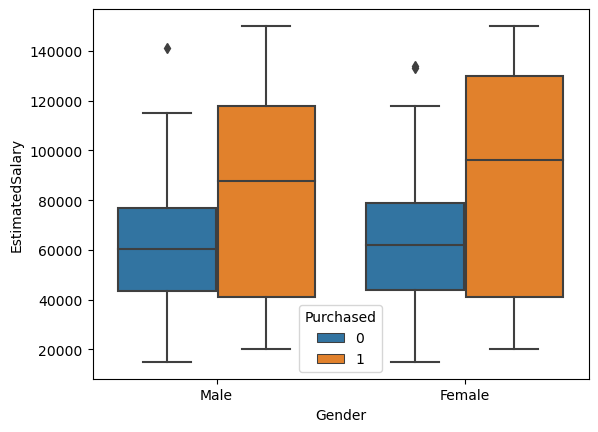

In [23]:
sns.boxplot(x='Gender',y='EstimatedSalary',data=df, hue='Purchased')

The mean and median of estimated salary of female demography are greater than that of the male demography. Also, people with high salary are the most probable to purchase the product.

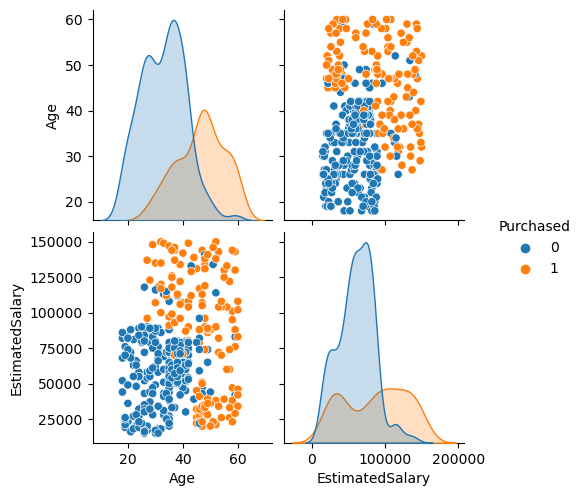

In [24]:
sns.pairplot(df, hue="Purchased")

## Model Training

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error

In [26]:
#feature variable or independent variable
x_feat = df.iloc[:,:-1]
x_feat

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [27]:
#target variable
y_feat = df.iloc[:,-1]
y_feat.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [28]:
print('Shape of x_feat =',x_feat.shape)
print('Shape of y_feat =',y_feat.shape)

Shape of x_feat = (400, 3)
Shape of y_feat = (400,)


In [29]:
#Encoding Categorical data i.e. Gender
le = LabelEncoder()
x_feat['Gender']=le.fit_transform(x_feat.iloc[:,0])

In [30]:
x_feat

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [31]:
#Getting datatype of Gender column after encoding
x_feat.dtypes

Gender             int64
Age                int64
EstimatedSalary    int64
dtype: object

In [32]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x_feat,y_feat,test_size=0.2, random_state=42)

In [33]:
print('Shape of x_train =',x_train.shape)
print('Shape of y_train =',y_train.shape)
print('Shape of x_test =',x_test.shape)
print('Shape of y_test =',y_test.shape)

Shape of x_train = (320, 3)
Shape of y_train = (320,)
Shape of x_test = (80, 3)
Shape of y_test = (80,)


<AxesSubplot:xlabel='Age', ylabel='Density'>

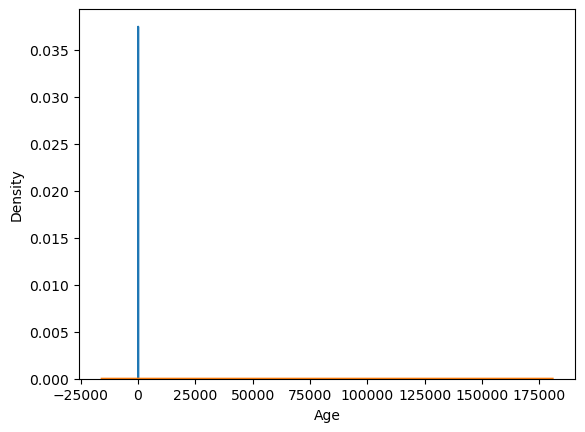

In [34]:
sns.kdeplot(df['Age'])
sns.kdeplot(df['EstimatedSalary'])

We can observe that the data is distributed in a wide range (i.e. the difference between max and min values are very high). Hence we have to normalize the data to fit in a predefined range for ease in calculation.

In [35]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [36]:
x_train = pd.DataFrame(x_train)
x_train.describe()

,0,1,2
count,320.000000,3.200000e+02,3.200000e+02
mean,0.000000,-2.525757e-16,9.367507e-18
std,1.001566,1.001566e+00,1.001566e+00
min,-1.000000,-1.949836e+00,-1.608102e+00
25%,-1.000000,-7.723913e-01,-7.935968e-01
50%,0.000000,-8.554870e-02,2.090805e-02
75%,1.000000,6.994143e-01,5.154289e-01
max,1.000000,2.171220e+00,2.318975e+00


In [37]:
x_test = pd.DataFrame(x_test)
x_test.describe()


,0,1,2
count,80.000000,80.000000,80.000000
mean,-0.100000,-0.106399,-0.078360
std,1.001265,1.132999,0.955593
min,-1.000000,-1.949836,-1.491744
25%,-1.000000,-0.968632,-0.800869
50%,-1.000000,-0.232729,-0.153629
75%,1.000000,0.895655,0.384526
max,1.000000,2.171220,2.144439


We can now observe that our Standard Deviation has reduced drastically to 1.001

Now we train the base version of our Logistic Regression Model.

In [38]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [39]:
lr_training_score = lr_model.score(x_train, y_train)*100
print('Training Score of Logistic Regression Model =',lr_training_score,'%')

Training Score of Logistic Regression Model = 81.5625 %


In [40]:
#Testing the model
y_pred_lr = lr_model.predict(x_test)
y_pred_lr

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [41]:
lr_testing_score = lr_model.score(x_test,y_test)*100
print('Testing Score of Logistic Regression =',lr_testing_score,'%')

Testing Score of Logistic Regression = 88.75 %


As our test score is greater than our treaining score, this can mean either of the following - 

i) The model has underfitted to the harder patterns
ii) There is gaussian noise in the dataset
iii) Might be a result of train test split

We will now do hyperparameter tuning and make the model better than the base model.

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
# defining the parameters
parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]

In [44]:
logreg = LogisticRegression(n_jobs=-1, verbose=True)
log_grid = GridSearchCV(estimator = logreg, param_grid = parameters, scoring = 'accuracy', cv=5, verbose=3, n_jobs=-1)

In [45]:
log_grid.fit(x_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
 This problem is unconstrained.
 This problem is unconstrained.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
/Users/navi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/navi/opt/anaconda3/lib/

RUNNING THE L-BFGS-B CODE

           * * *

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.77446D+02    |proj g|=  7.28924D+01
Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.77446D+02    |proj g|=  7.21074D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     10      1     0     0   2.598D-04   9.180D+01
  F =   91.802408544744438     

CONVERGENCE: REL_REDUCTION

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1, verbose=True),
             n_jobs=-1,
             param_grid=[{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']},
                         {'penalty': ['none', 'elasticnet', 'l1', 'l2']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100]}],
             scoring='accuracy', verbose=3)

In [46]:
print("Best params for the model according to Grid Search : ",log_grid.best_estimator_)

Best params for the model according to Grid Search :  LogisticRegression(n_jobs=-1, solver='newton-cg', verbose=True)


In [47]:
print("Best training score of logistic regression model after k-fold cross validation = ",log_grid.best_score_*100)

Best training score of logistic regression model after k-fold cross validation =  81.5625


In [48]:
y_pred = log_grid.predict(x_test)

In [49]:
lr_hyper_testing_score = log_grid.score(x_test,y_test)*100
print('Best Testing Score of Logistic Regression =',lr_hyper_testing_score,'%')

Best Testing Score of Logistic Regression = 88.75 %


We see that our tuned model performs better than the base model by aiming for a more generalized model using kfold cross validation.

## Evaluation of our Model

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score

We will start with creating a confusion matrix for our logistic regression classifications.

In [51]:
conf_matrix = confusion_matrix(y_test, y_pred)

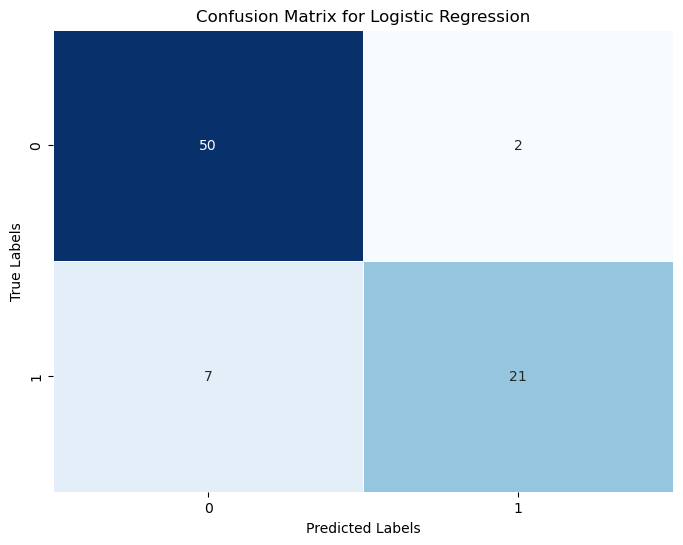

In [52]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)

# Add labels and a title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')

# Show the plot
plt.show()

Now we create a Classification report that contains the precision, recall and f1 score that we derive from the above confusion matrix

In [53]:
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



Let's now calculate the ROC AUC score and plot a graph that signifis the same.

In [54]:
# ROC AUC Score
y_prob = log_grid.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC Score: {roc_auc:.2f}')

ROC AUC Score: 0.97


In [55]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

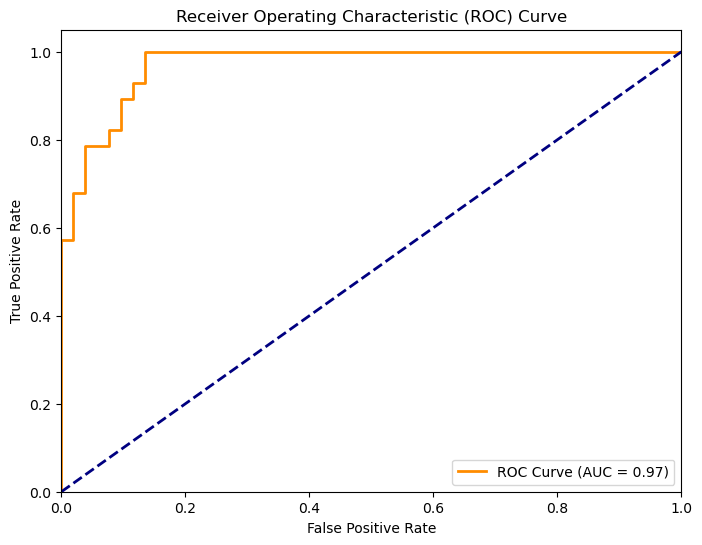

In [56]:
# Create the ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Let's consolidate the precision recall and f1 score to one cell

In [57]:
# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.2f}')

Precision: 0.91
Recall: 0.75
F1 Score: 0.82


Our model has performed well for the given use case and can accurately predict the test cases with a precision score of 91%.